# Brownian Motion with Drift

The purpose of this notebook is to review and illustrate the Arithmetic Brownian Motion and some of its main properties.

![image](_static/brownian_motion_arithmetic.png)

## Definition

## Definition

The Arithmetic Brownian motion can be defined by the following Stochastic Differential Equation (SDE)

\begin{equation}
dX_t = \mu dt + \sigma W_t, \quad t >0,
\end{equation}

with initial condition $X_0 =x_0$, and constant parameters $\mu\in \mathbb{R}$, $\sigma>0$. Without loss of generality we are going to assume that $x_0=0$. Here, $W_t$ denotes a standard Brownian motion.

Equation (2.1) equivales to

\begin{align}
X_t &= \int_0^t \mu ds + \int_0^t \sigma dW_t =  \mu t +  \sigma W_t,
\end{align}

which gives us the solution. 

## Marginal Distributions

The las expression in  (2.2)  implies that for each $t>0$, the marginal  $X_t$ is normally distributed since it is simply written as a sum of a deterministic part and a the marginal of a standard Brownian motion –which follows a Gaussian distritbuion $\mathcal{N}(0,t)$.

### Expectation,  Variance, and Covariance

By simply using the expression

$$X_t = \mu t + \sigma W_t,$$

we obtain
\begin{equation*}
\mathbf{E} [X_t] = \mu t  \qquad \forall t\geq 0,
\end{equation*}
and 
\begin{equation*}
\mathbf{Var} [X_t] = \sigma^2 t \qquad \forall t> 0.
\end{equation*}

So we have

\begin{equation}
X_t \sim \mathcal{N}(\mu t, \sigma^2 t),  \qquad \forall t>0.
\end{equation}

Besides, for any $ t > s >0$, we have
\begin{align*}
\mathbf{Cov} [X_t, X_s] &= \sigma^2 \min\{s, t\},\\  
\end{align*}
using the properties of the covariance and the fact that
\begin{equation*}
\mathbf{Cov} [W_t, W_s] = \min\{s, t\}, \qquad \forall s, t>0.
\end{equation*}


### Marginal Distributions in Python

Knowing the distribution –with its corresponding parameters– of the marginal variables allows us to reproduce them with `Python`. 

One way to do this is by using the object  `norm`  from the library `scipy.stats`.  

The next cell shows how to create $X_1$ using this method.

In [1]:
import numpy as np
from scipy.stats import norm
mu = 1.0
sigma = 0.25
t = 1.0

X_1 = norm(loc=mu*t, scale= sigma*np.sqrt(t))

In [2]:
X_1.stats(moments='mvsk')

(1.0, 0.0625, 0.0, 0.0)

Another way to do this  is by creating an object  `BrownianMotion` from `aleatory.processes` and calling the method `get_marginal` on it. 

The next cell shows how to create the marginal $X_1$ using this method.

In [3]:
from aleatory.processes import BrownianMotion
process = BrownianMotion(drift=1.0, scale=0.25)
X_1 = process.get_marginal(t=1)

In [4]:
X_1.stats(moments='mvsk')

(1.0, 0.0625, 0.0, 0.0)


Hereafter, we will use the latter method to create marginal distributions from the arithmetic Brownian Motion.

### Probability Density Functions

The probability density function (pdf) of the marginal distribution $X_t$ is given by the following expression
\begin{equation*}
f(x, t; \mu, \sigma) = \dfrac{1}{\sigma \sqrt{2 \pi t}}\exp\left\{ -\dfrac{1}{2} \left(\dfrac{x-\mu t}{\sigma \sqrt{t}}\right)^2  \right\}, \qquad \forall x\in\mathbb{R}, t>0.
\end{equation*}

#### Visualisation
In order to visualise these functions, we are going to load the library `matplotlib` and set some formatting options.

In [5]:
import matplotlib.pyplot as plt

In [6]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
%config InlineBackend.figure_format ='retina'

We can plot the pdf of $W_1$ as follows.

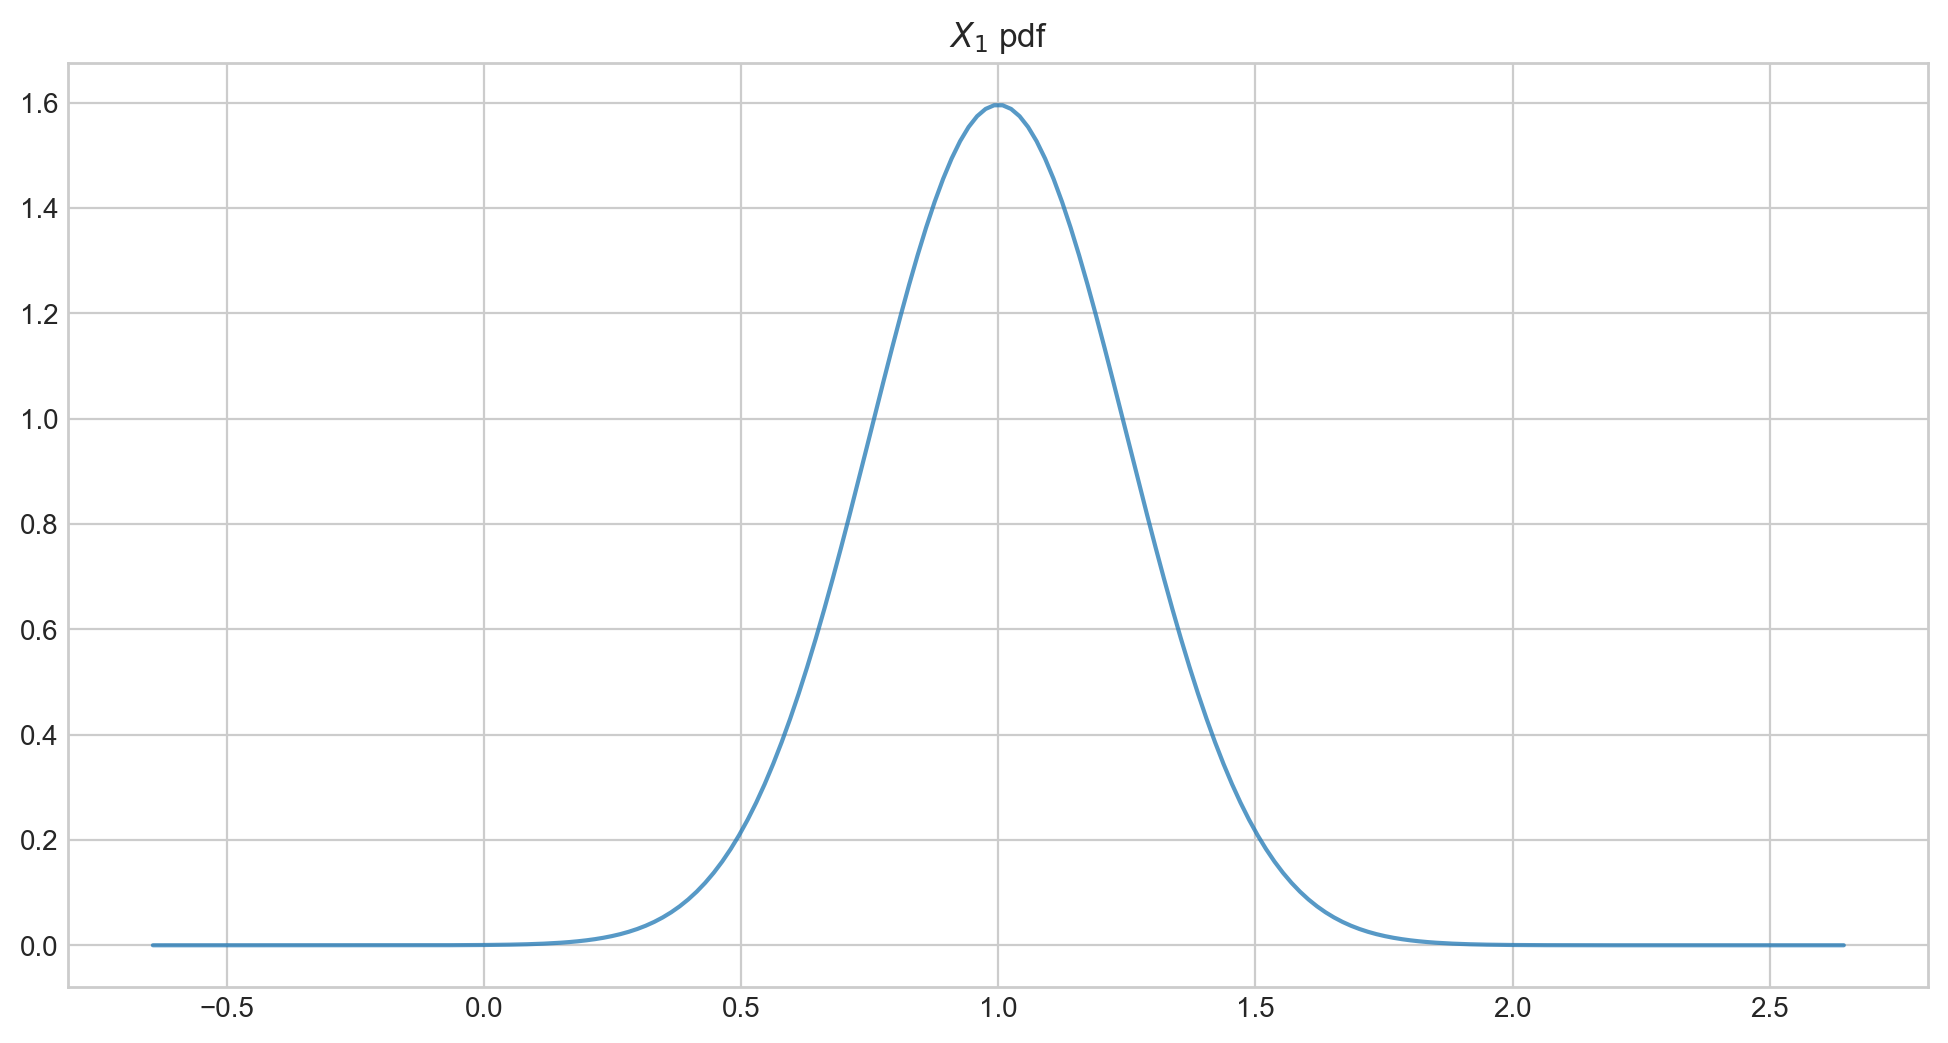

In [7]:
process = BrownianMotion(drift=1.0, scale=0.25)
X_1 = process.get_marginal(t=1)
x = np.linspace(X_1.ppf(0.005) -1 , X_1.ppf(0.995)+1,200)
plt.plot(x, X_1.pdf(x), '-', lw=1.5, alpha=0.75, label=f'$t$={1:.2f}')
plt.title(f'$X_1$ pdf')
plt.show()

Next, let's take a look at the pdfs for different marginal distributions $X_t$.

First, let us consider an arithmetic Brownian Motion with scale $\sigma=0.25$ and a positive drift $\mu=1.0$.

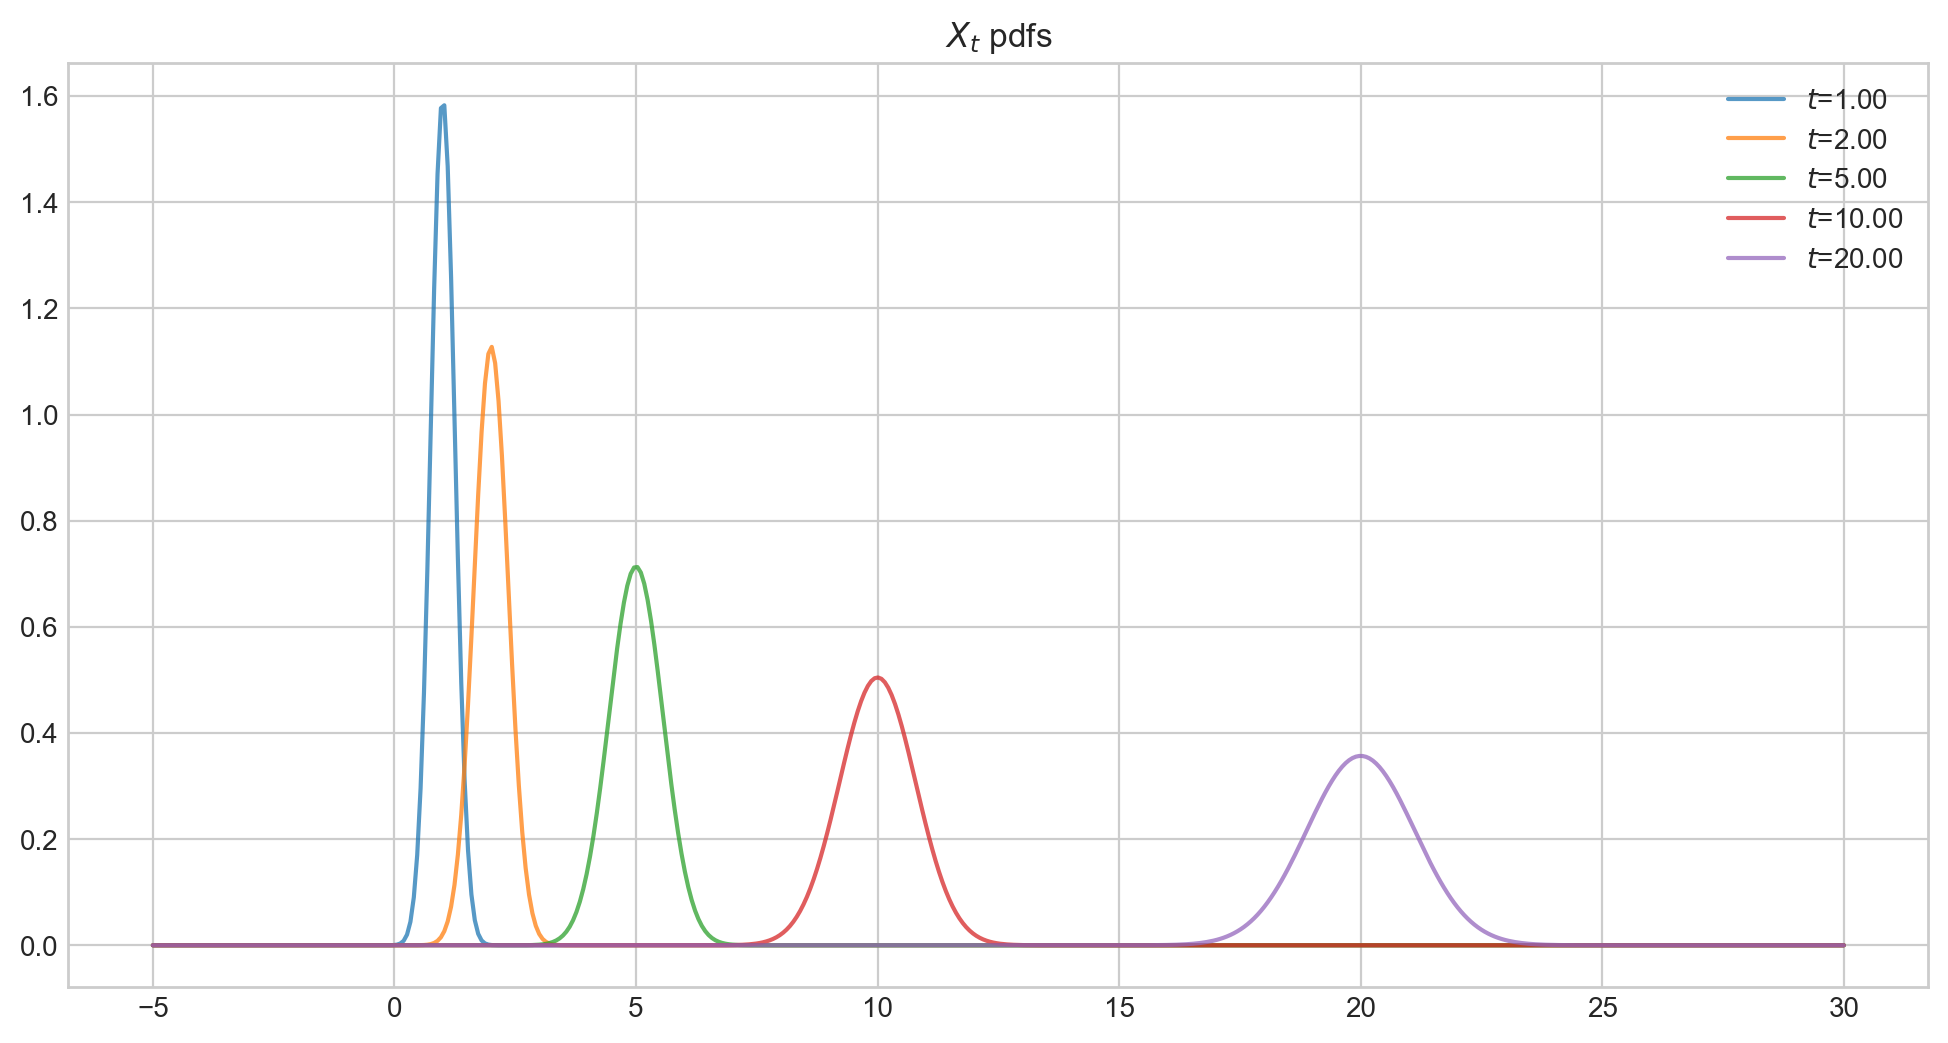

In [8]:
process = BrownianMotion(drift=1.0, scale=0.25)
fig, ax1 = plt.subplots(1, 1)
for t in [1,2,5, 10, 20]:
    X_t= process.get_marginal(t)
    x = np.linspace(-5, 30, 500)
    ax1.plot(x, X_t.pdf(x), '-', lw=1.5,
             alpha=0.75, label=f'$t$={t:.2f}')
ax1.legend()
plt.title('$X_t$ pdfs')
plt.show()

Now, let us consider an arithmetic Brownian Motion with scale $\sigma=0.25$ and a positive drift $\mu=-1.0$.

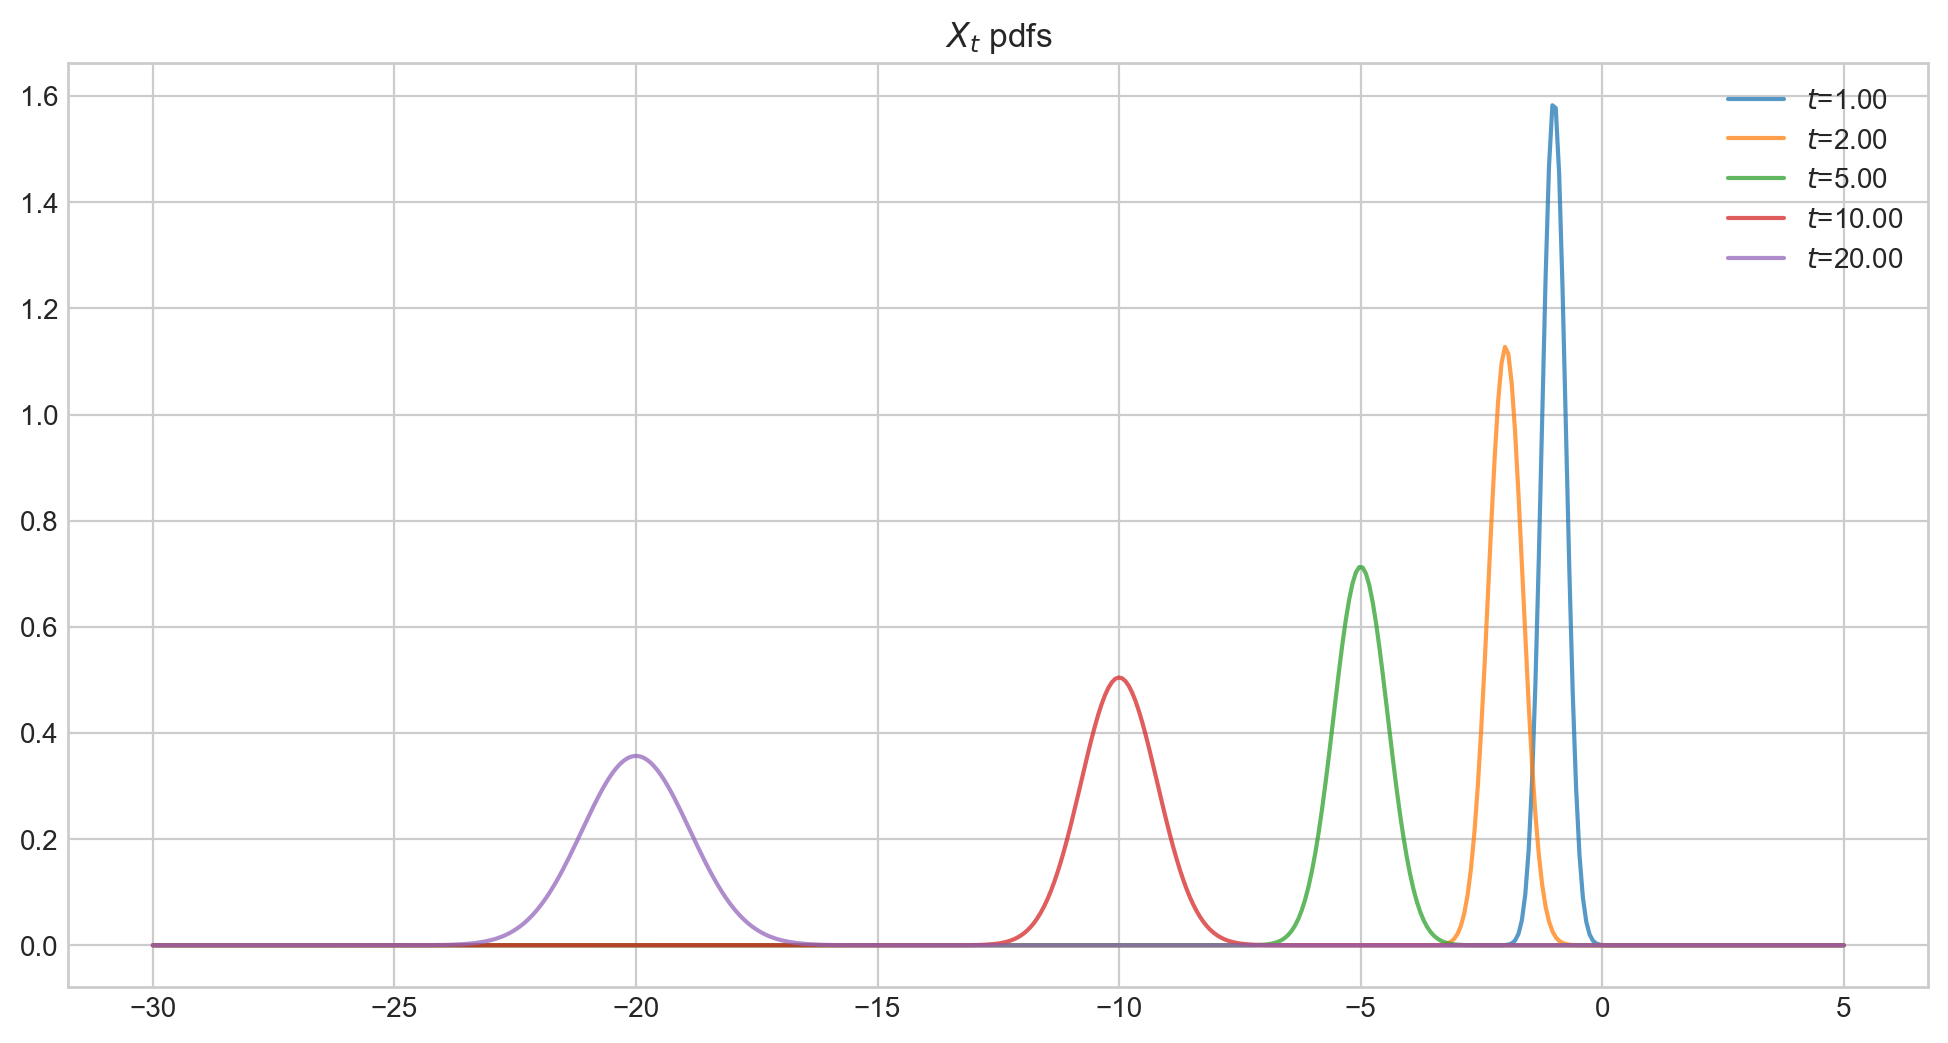

In [9]:
process = BrownianMotion(drift=-1.0, scale=0.25)
fig, ax1 = plt.subplots(1, 1)
for t in [1, 2, 5, 10, 20]:
    X_t = process.get_marginal(t)
    x = np.linspace(-30, 5, 500)
    ax1.plot(x, X_t.pdf(x), '-', lw=1.5,
             alpha=0.75, label=f'$t$={t:.2f}')
ax1.legend()
plt.title('$X_t$ pdfs')
plt.show()

In these charts, we can see the characteristic symmetric bell-shaped curves of the normal/Gaussian distribution. 
Moreover, we can make the following observations:
 
- $X_t$ will clearly take positive and negative values 
- If the drift is positive/negative, then $X_t$ will take bigger/smaller (in magnitude) values more likely as $t$ increases
- If the drift is positive/negative, then the pdfs of $X_t$ moves towards the right/left as $t$ increases.
- The pdfs of $X_t$ flatten/spread as $t$ increases.

### Sampling

Now, let's see how to obtain a random sample from the marginal $X_t$ for $t>0$. 

The next cell shows how to get a sample of size 5 from $X_1$.

In [10]:
from aleatory.processes import BrownianMotion
process = BrownianMotion(drift=1.0, scale=0.25)
X_t = process.get_marginal(t=1.0) 
X_t.rvs(size=5)

array([0.99264507, 0.48099876, 1.26937355, 1.32477716, 0.95220962])

Similarly, we can get a sample from $X_{10}$, as follows

In [11]:
X_t = process.get_marginal(t=10.0)
X_t.rvs(size=5)

array([10.54110571,  9.13721233, 10.94021493,  9.5811997 , 10.70526578])

## Simulation

In order to simulate paths from a stochastic process, we need to set a discrete partition over an interval for the simulation to take place. 

For simplicity, we are going to consider an equidistant partition of size $n$ over $[0,T]$, i.e.:
\begin{equation*}
t_i = \frac{i}{n-1} T \qquad  \hbox{for } i = 0, \cdots, n-1.
\end{equation*}
Then, the goal is to simulate a path of the form $\{ X_{t_i} , i=0,\cdots, n-1\}$. There are a number of ways to do this. Here, we are going to use equation (2), i.e.

\begin{equation*}
X_t = \mu t  + \sigma W_t, 
\end{equation*}

and the fact that we know how to simulate a Brownian Motion (see [Brownian Motion](https://quantgirluk.github.io/Understanding-Quantitative-Finance/brownian_motion.html) for details).

First, we construct the partition, using `np.linspace`, and calculate the standard deviation of the normal random variable $\mathcal{N}(0, \frac{T}{n-1})$, i.e.:

$$\sigma = \sqrt{\frac{T}{n-1}}.$$

In [12]:
from aleatory.processes import BrownianMotion

T = 1.0
n = 100
mu = 1.0
sigma = 0.25
t = 1.0
times = np.linspace(0, T, n)  # Partition
BM = BrownianMotion(T=T)
bm_path = BM.sample_at(times)
abm_path = mu*times + sigma*bm_path


Let's plot our simulated path!

In [13]:
normal_increments = norm.rvs(loc=0, scale=sigma, size=n-1) # Sample of size n-1
normal_increments = np.insert(normal_increments, 0, 0) # This is the initial point
Wt = normal_increments.cumsum() # Taking the cumulative sum

```{note}
Note that we had to add the initial point of the Brownian motion.
```

Let's plot our simulated path!

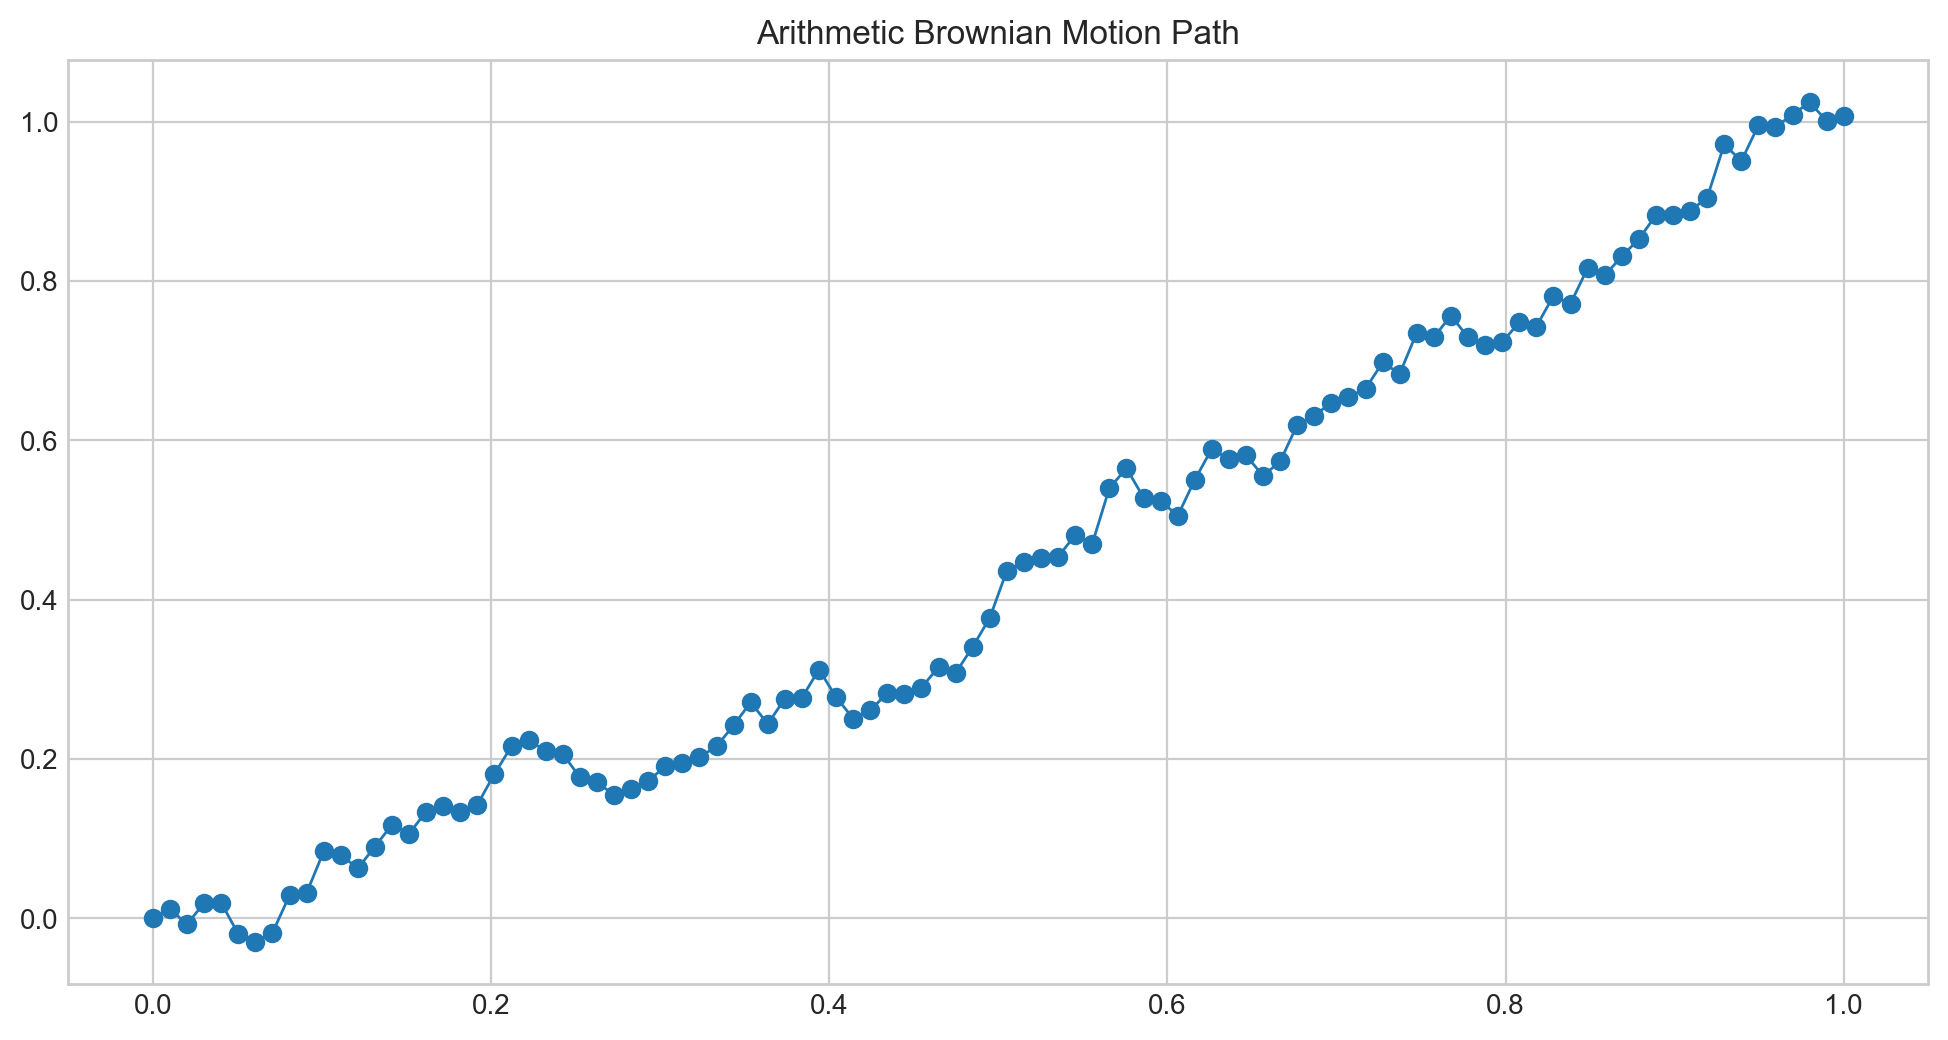

In [14]:
plt.plot(times, abm_path, 'o-', lw=1)
plt.title('Arithmetic Brownian Motion Path')
plt.show()


```{note}
In this plot, we are using a linear interpolation to draw the lines between the simulated points. 
```

### Simulating and Visualising Paths

To simulate several paths from an Arithmetic Brownian Motion and visualise them we can use the method `plot` from the `aleatory` library. 




Let's simulate 10 paths over the interval $[0,1]$ using a partition of 100 points. 



`````{admonition} Tip
:class: tip
Remember that  the number of points in the partition is defined by the parameter $n$, while  the number of paths is determined by $N$.
`````

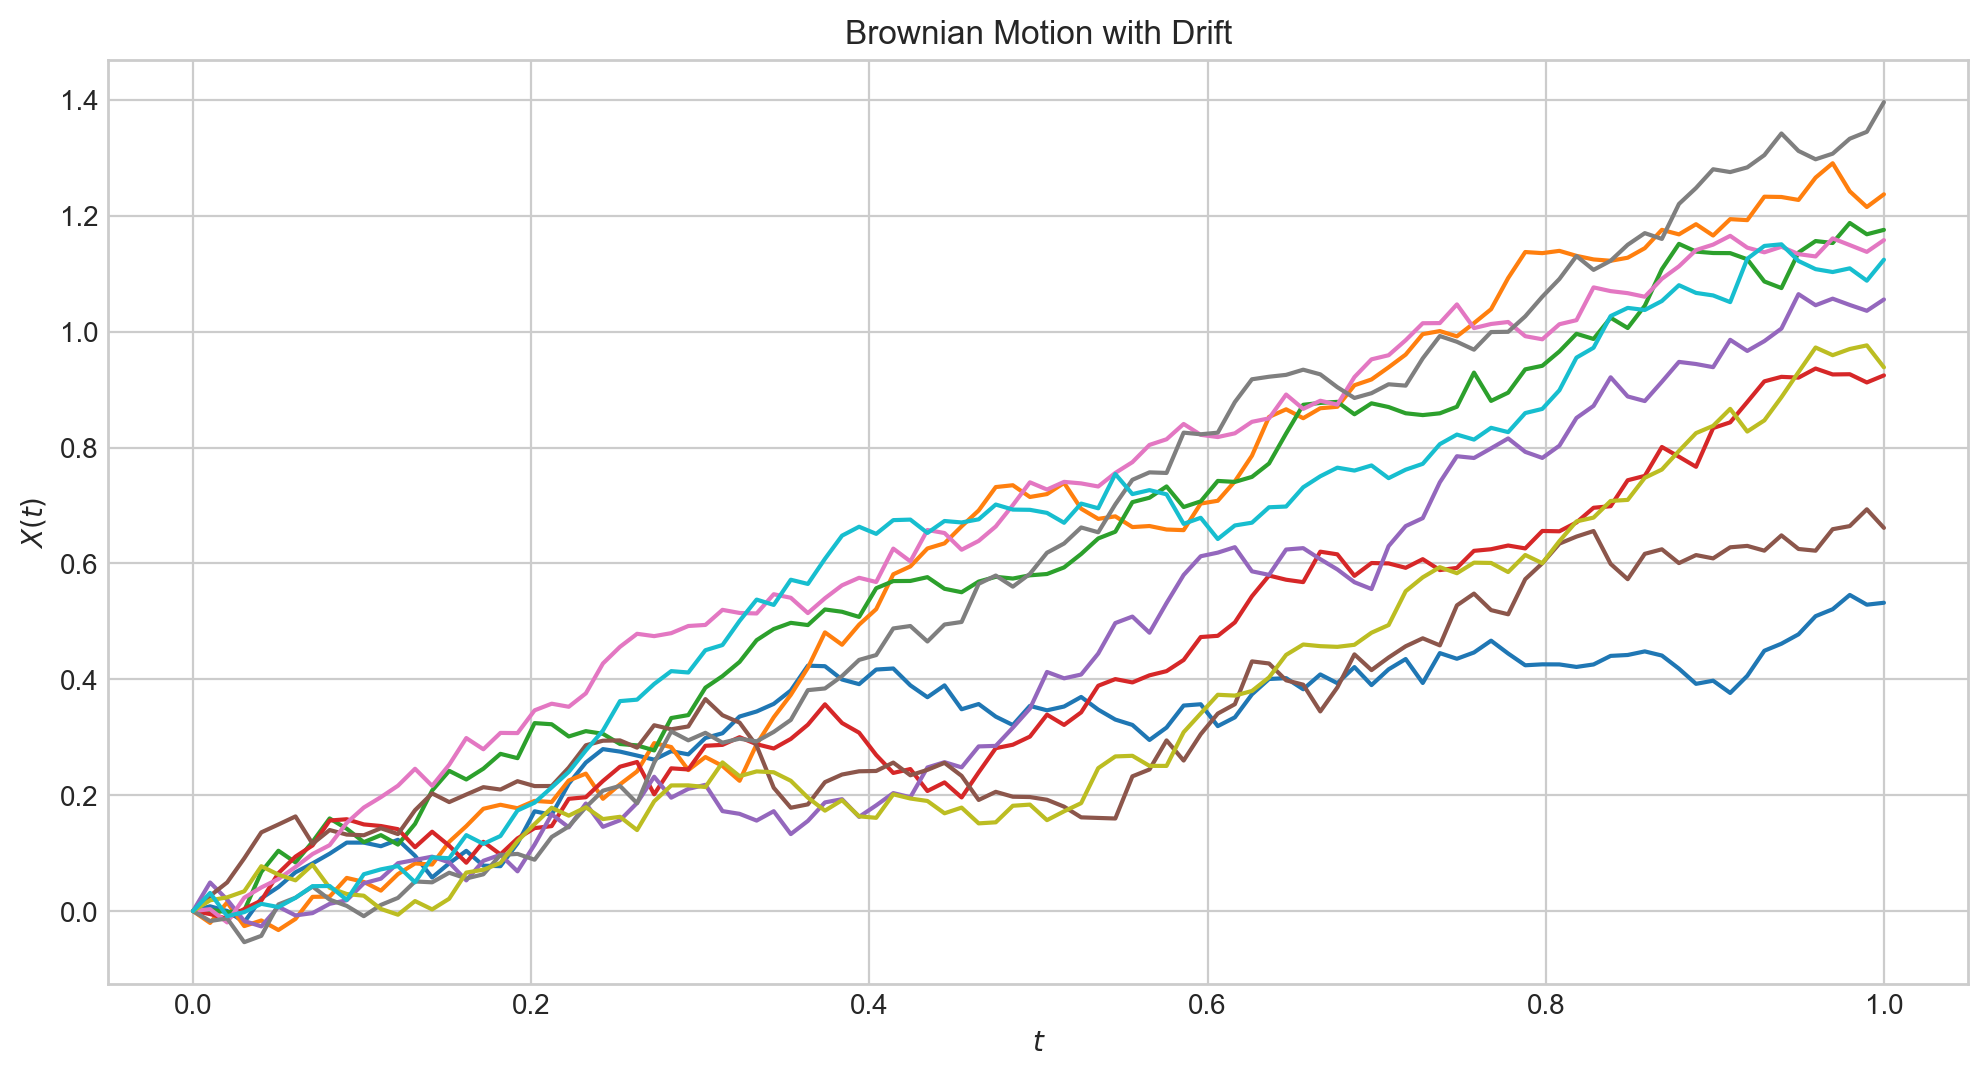

In [15]:
process = BrownianMotion(drift=1.0, scale=0.25)
process.plot(n=100, N=10)
plt.show()

Similarly, we can define an arithmetic Brownian Motion over the interval $[0, 10]$ and simulate 50 paths with a partition of size 100.

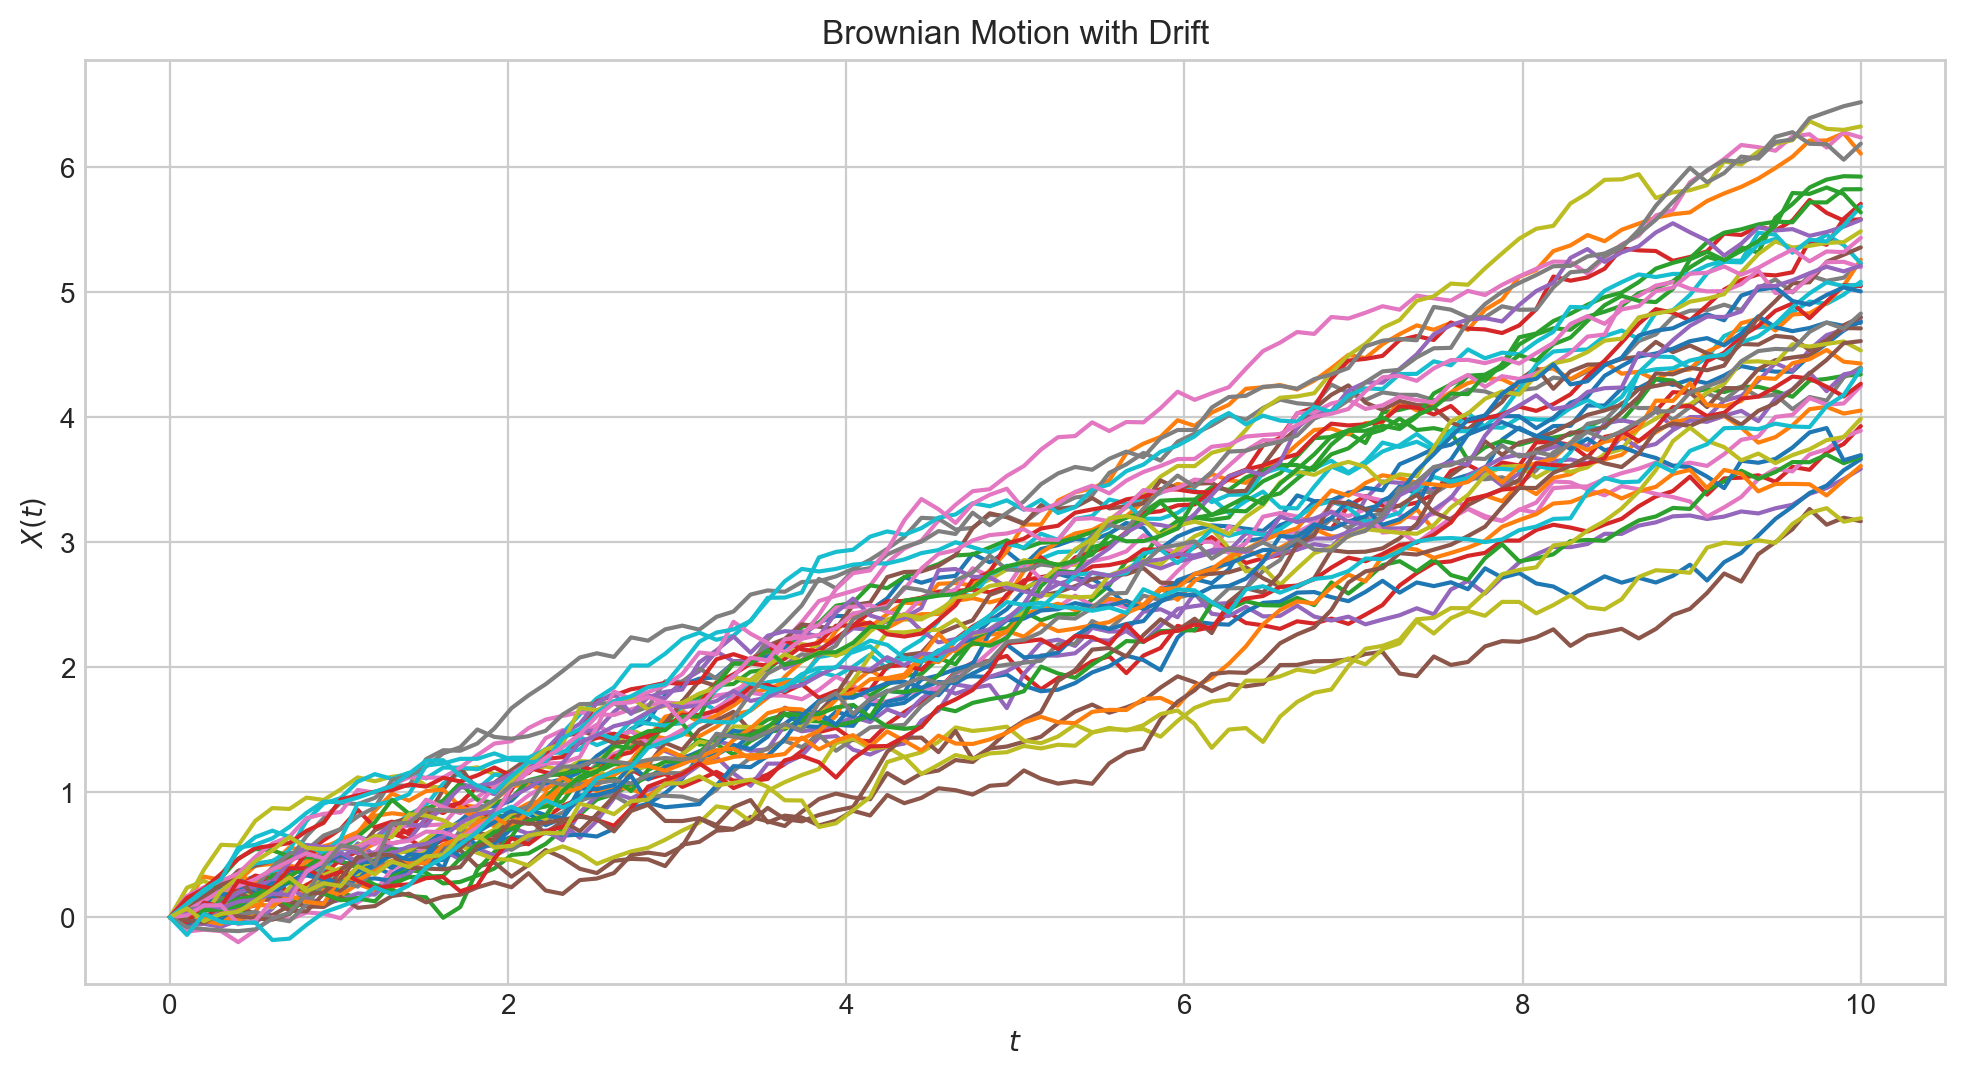

In [16]:
process = BrownianMotion(drift=0.5, scale=0.25, T=10)
process.plot(n=100, N=50)
plt.show()

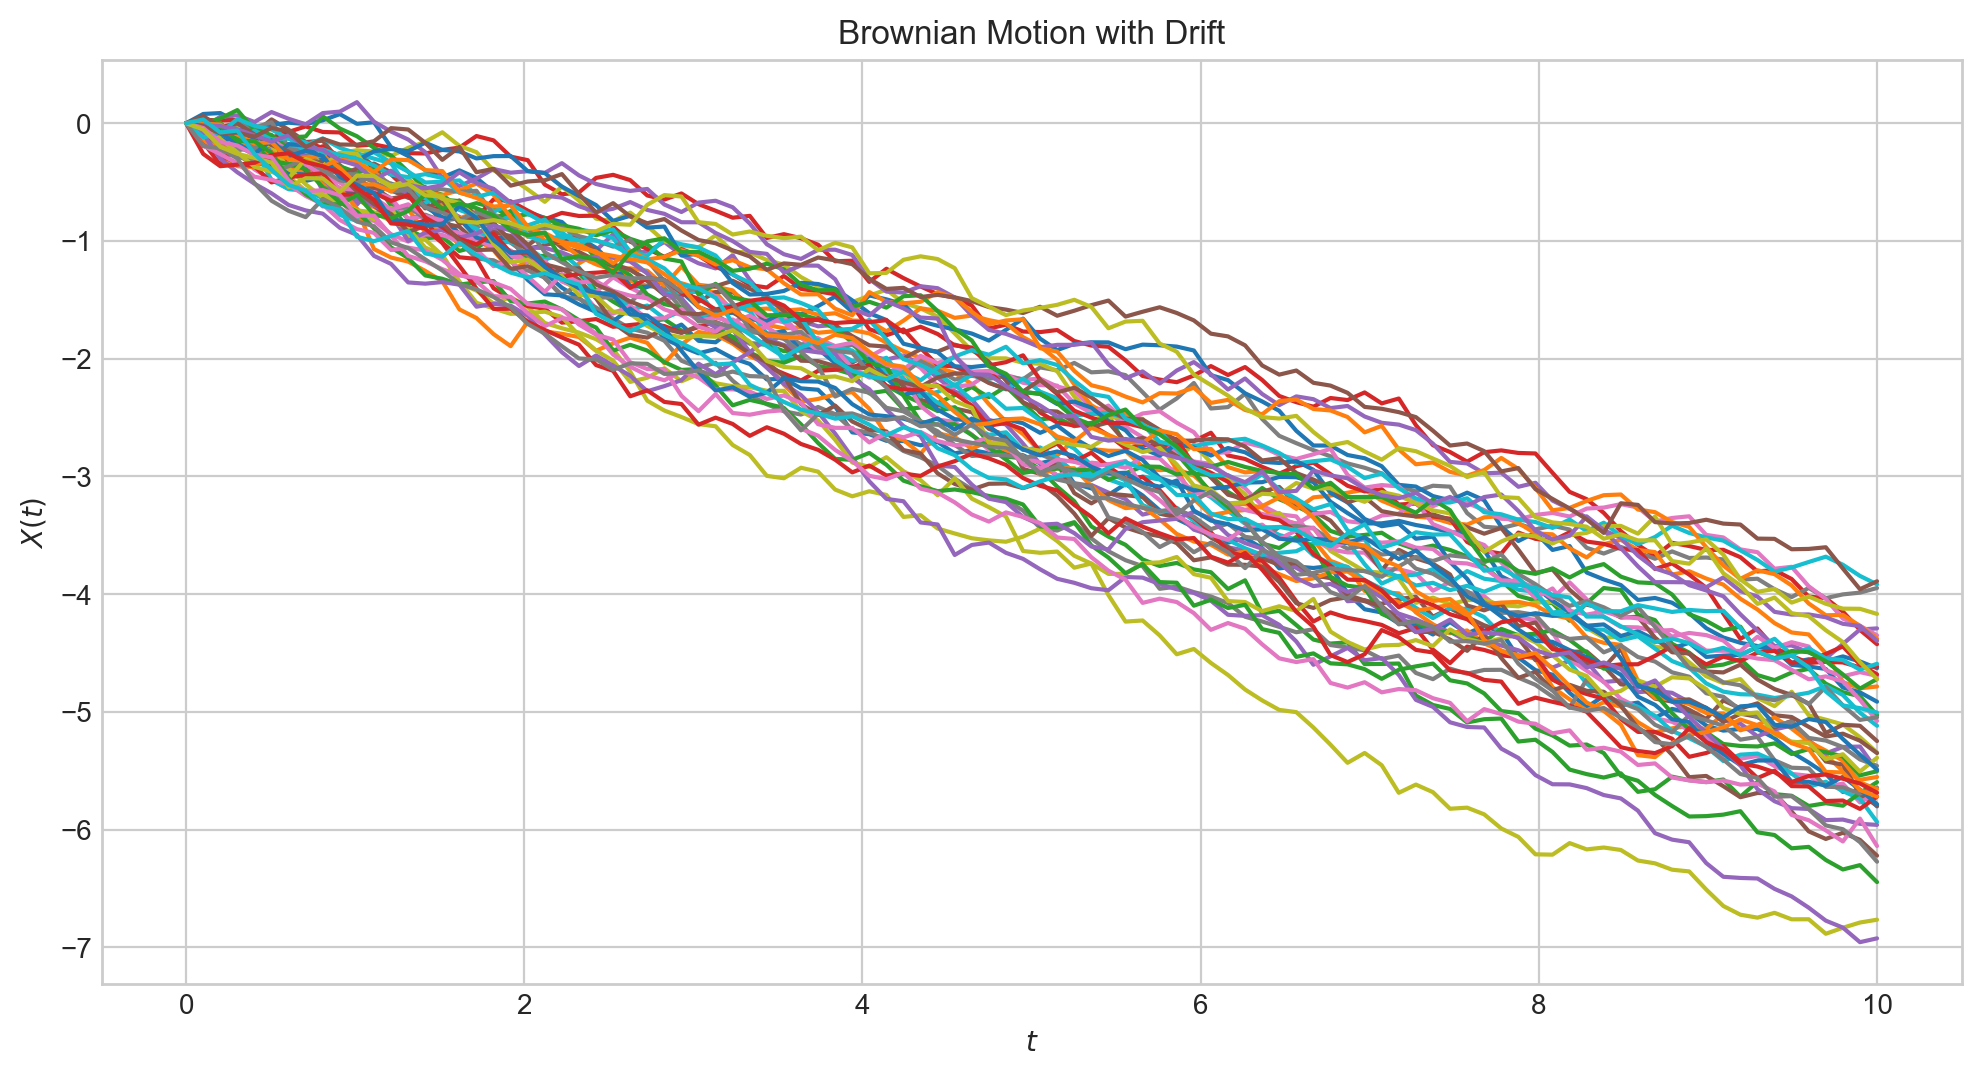

In [17]:
process = BrownianMotion(drift=-0.5, scale=0.25, T=10)
process.plot(n=100, N=50)
plt.show()


## Long Time Behaviour

### Expectation and Variance

We have 

\begin{equation*}
\lim_{t\rightarrow\infty} E\left[X_t \right] = \lim_{t\rightarrow\infty}  \mu t   = 
\begin{cases}
\infty, \hbox{  if  } \mu>0\\
0 \hbox{  if  }  \mu=0\\
-\infty, \hbox{  if  }  \mu<0, \\
\end{cases}
\end{equation*}

and
\begin{equation*}
\lim_{t\rightarrow\infty}Var[ X_t] = \lim_{t\rightarrow\infty} \sigma^2 t = \infty.
\end{equation*}

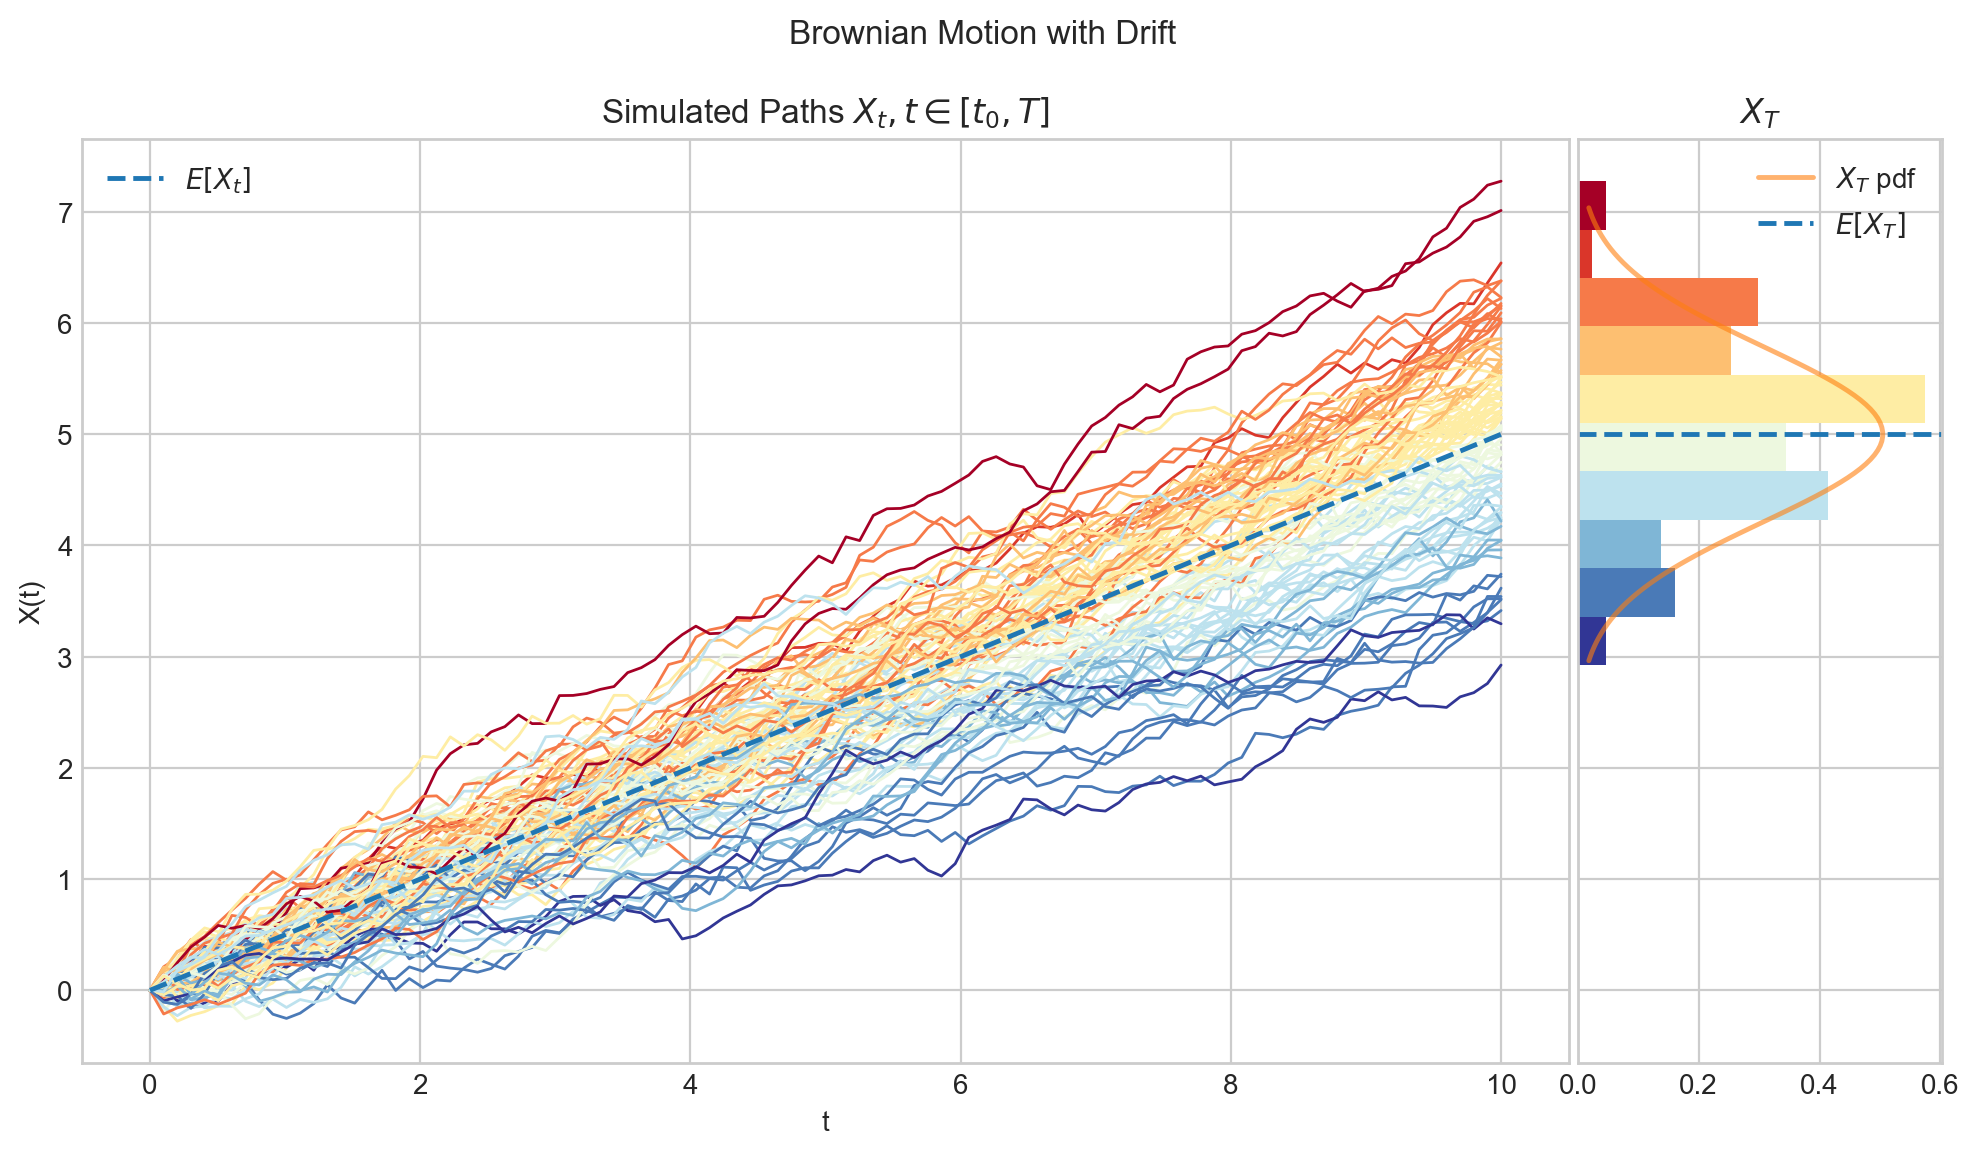

In [18]:
from aleatory.processes import BrownianMotion

process = BrownianMotion(drift=0.5, scale=0.25, T=10)
process.draw(n=100, N=100)
plt.show()

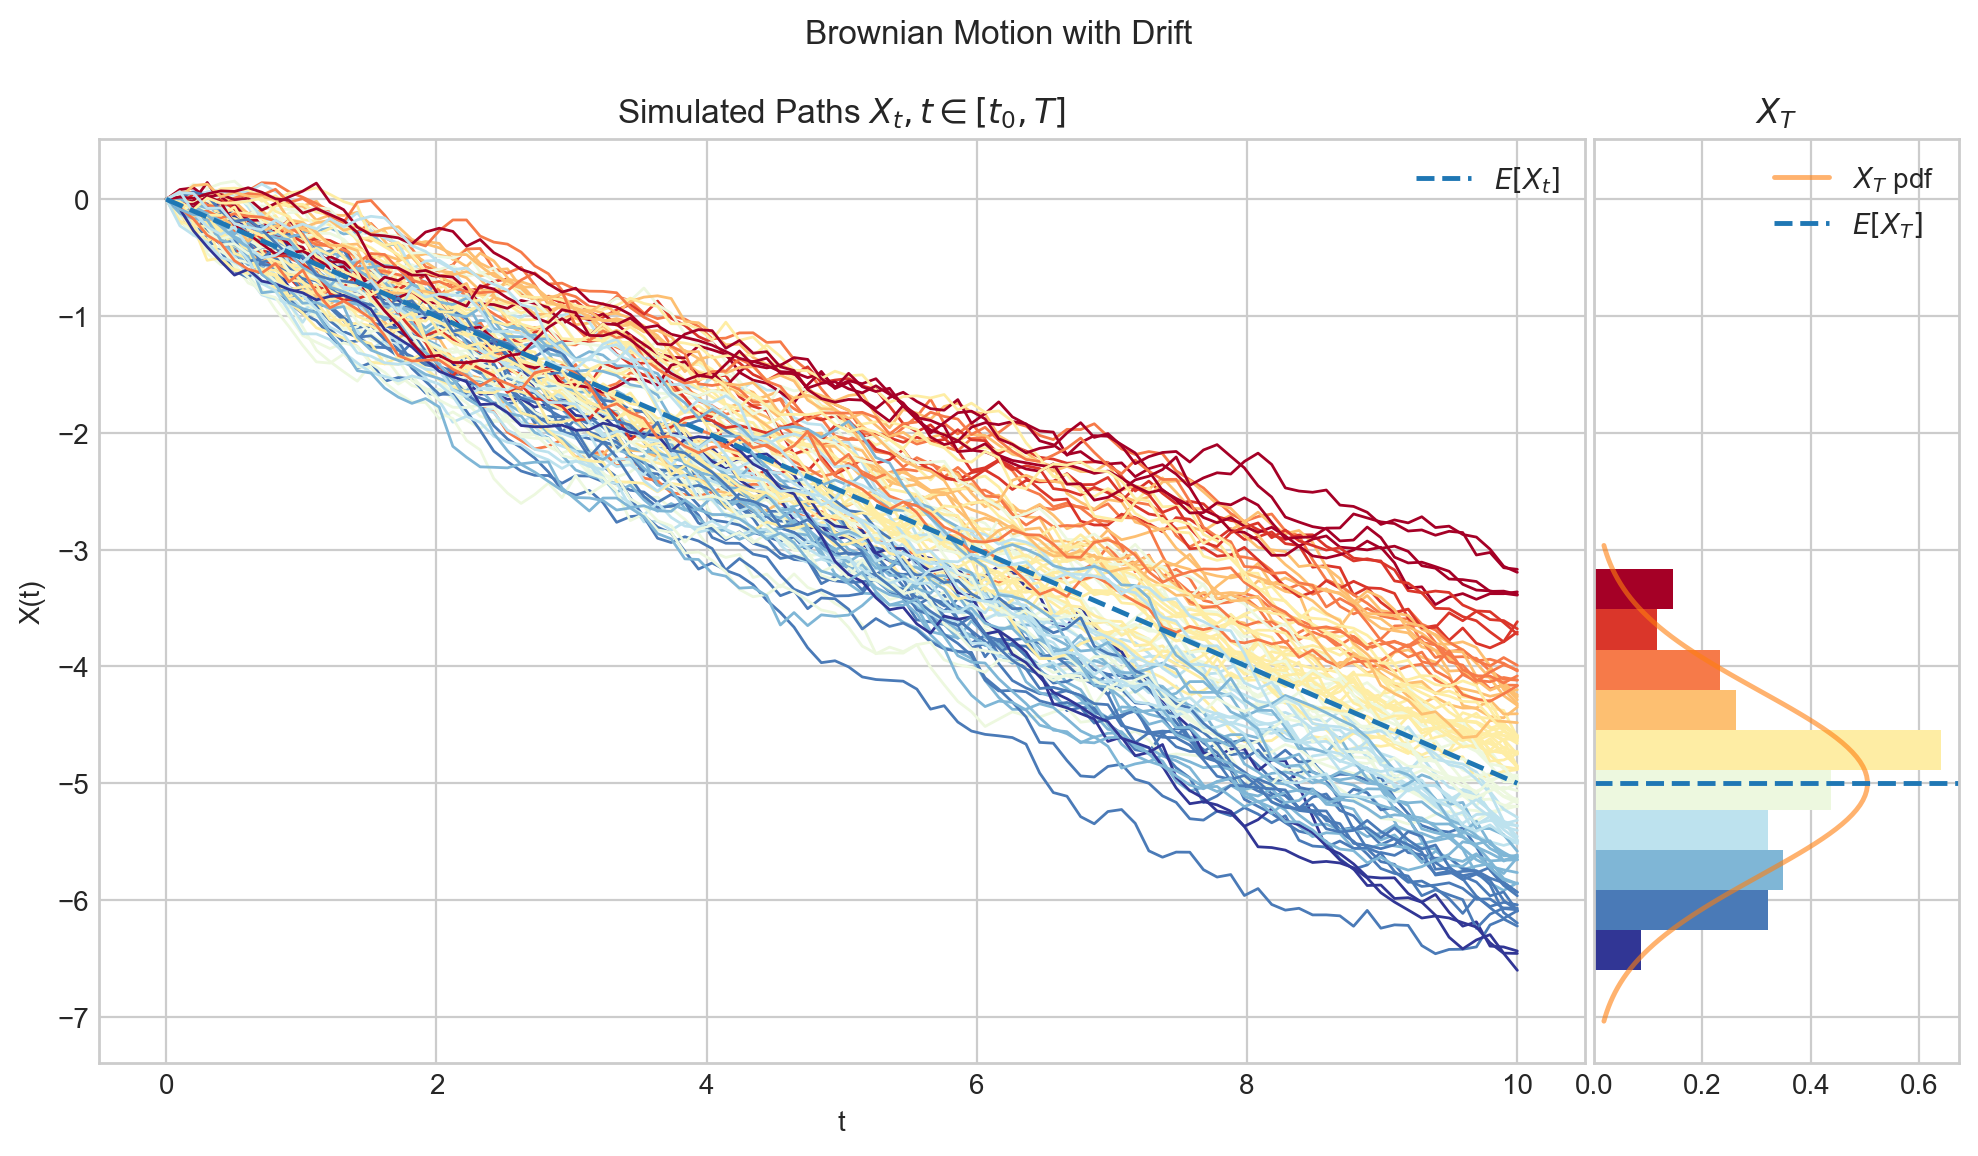

In [19]:
from aleatory.processes import BrownianMotion

process = BrownianMotion(drift=-0.5, scale=0.25, T=10)
process.draw(n=100, N=100)
plt.show()


## Visualisation

To finish this note, let's take a final look at a simulation from the arithmetic Brownian Motion.

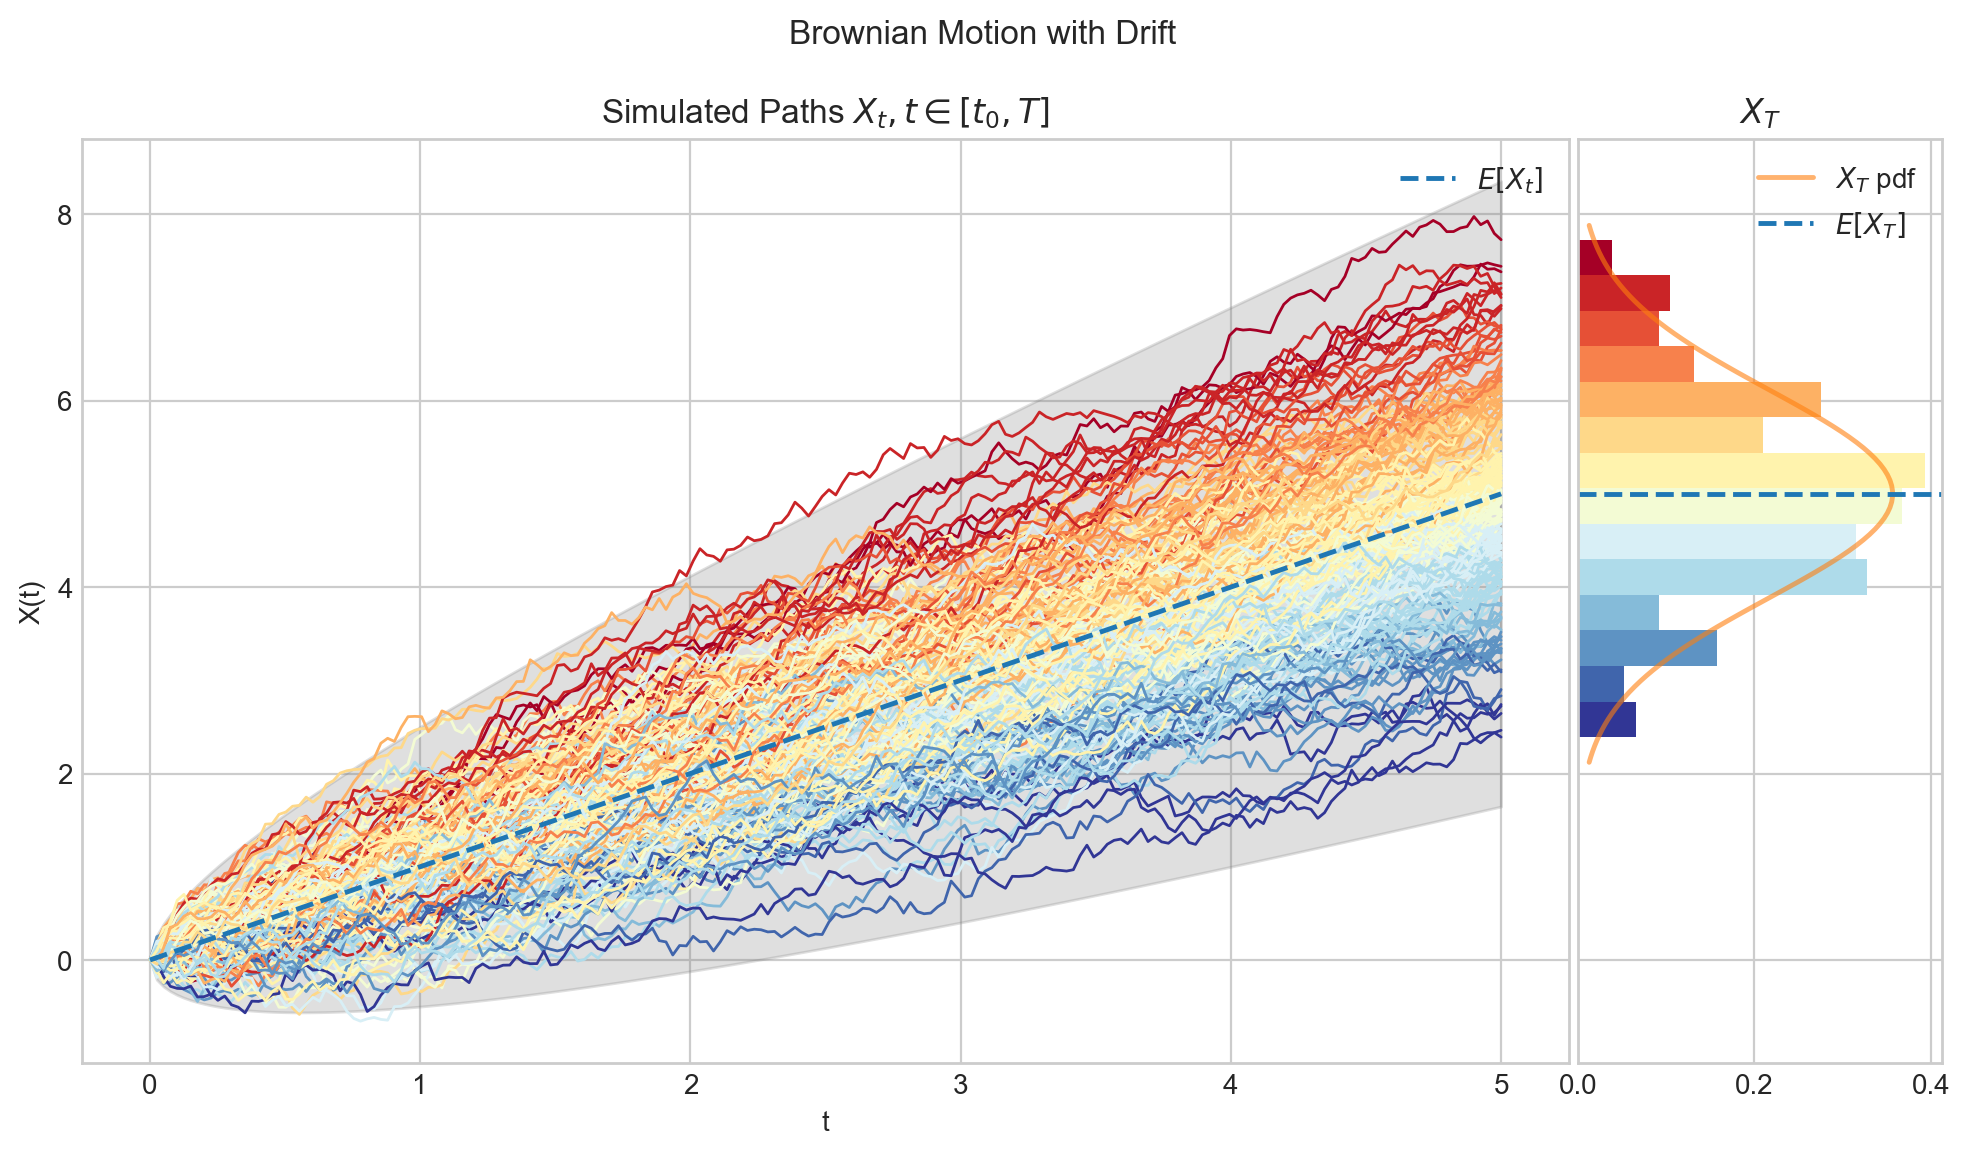

In [20]:
process = BrownianMotion(drift=1.0, scale=0.50, T=5.0)
process.draw(n=200, N=200, envelope=True)
plt.show()

## References and Further Reading

- [Brownian Motion](https://www.stat.berkeley.edu/~aldous/205B/bmbook.pdf) Notes by Peter Morters and Yuval Peres (2008).
